In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor

from sklearn.tree import DecisionTreeRegressor

import pandas as pd

In [2]:
import matplotlib.colors as colors
%matplotlib inline
#graphical example
import time
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
#this next line is only needed in iPython notebooks
%matplotlib inline 
import math
import matplotlib.font_manager as fm
import matplotlib.ticker as mtick
font = fm.FontProperties(size = 12)
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
def hide_spines(intx=False,inty=False):
    """Hides the top and rightmost axis spines from view for all active
    figures and their respective axes."""

    # Retrieve a list of all current figures.
    figures = [x for x in matplotlib._pylab_helpers.Gcf.get_all_fig_managers()]
    if (plt.gca().get_legend()):
        plt.setp(plt.gca().get_legend().get_texts(), fontproperties=font) 
    i = 0
    for figure in figures:
        # Get all Axis instances related to the figure.
        for ax in figure.canvas.figure.get_axes():
            # Disable spines.
            ax.spines['right'].set_color('none')
            ax.spines['top'].set_color('none')
            # Disable ticks.
            ax.xaxis.set_ticks_position('bottom')
            print(ax)
            if (i == 0):
                ax.yaxis.set_ticks_position('left')
           # ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda v,_: ("10$^{%d}$" % math.log(v,10)) ))
            for label in ax.get_xticklabels() :
                label.set_fontproperties(font)
            for label in ax.get_yticklabels() :
                label.set_fontproperties(font)
            #ax.set_xticklabels(ax.get_xticks(), fontproperties = font)
            ax.set_xlabel(ax.get_xlabel(), fontproperties = font)
            ax.set_ylabel(ax.get_ylabel(), fontproperties = font)
            ax.set_title(ax.get_title(), fontproperties = font)
            if (inty):
                ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%d'))
            if (intx):
                ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%d'))
            i += 1
def show(nm,a=0,b=0,show=1):
    hide_spines(a,b)
    #ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda v,_: ("10$^{%d}$" % math.log(v,10)) ))
    #plt.yticks([1,1e-2,1e-4,1e-6,1e-8,1e-10,1e-12], labels)
    #ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda v,_: ("10$^{%d}$" % math.log(v,10)) ))
    if (len(nm)>0):
        plt.savefig(nm,bbox_inches='tight');
    if show:
        plt.show()
    else:
        plt.close()

In [3]:
sd = pd.read_excel("ShockBreakout.xls", header=1)
sd = sd.iloc[0:103,]

In [4]:
print(sd.iloc[:,[2,4,5,6,7]].head())
sd.shape

   Laser Energy (J)  Be Thickness (micron)  Be Gamma  Wall Opacity  \
0            3780.0                  18.44     1.522         0.776   
1            3640.0                  18.32     1.500         0.976   
2            3830.0                  19.59     1.472         0.729   
3            3950.0                  18.76     1.517         0.938   
4            3650.0                  21.56     1.444         0.910   

   Flux Limiter  
0        0.0587  
1        0.0500  
2        0.0544  
3        0.0563  
4        0.0540  


(103, 11)

AxesSubplot(0.125,0.729;0.155x0.151)
AxesSubplot(0.28,0.729;0.155x0.151)
AxesSubplot(0.435,0.729;0.155x0.151)
AxesSubplot(0.59,0.729;0.155x0.151)
AxesSubplot(0.745,0.729;0.155x0.151)
AxesSubplot(0.125,0.578;0.155x0.151)
AxesSubplot(0.28,0.578;0.155x0.151)
AxesSubplot(0.435,0.578;0.155x0.151)
AxesSubplot(0.59,0.578;0.155x0.151)
AxesSubplot(0.745,0.578;0.155x0.151)
AxesSubplot(0.125,0.427;0.155x0.151)
AxesSubplot(0.28,0.427;0.155x0.151)
AxesSubplot(0.435,0.427;0.155x0.151)
AxesSubplot(0.59,0.427;0.155x0.151)
AxesSubplot(0.745,0.427;0.155x0.151)
AxesSubplot(0.125,0.276;0.155x0.151)
AxesSubplot(0.28,0.276;0.155x0.151)
AxesSubplot(0.435,0.276;0.155x0.151)
AxesSubplot(0.59,0.276;0.155x0.151)
AxesSubplot(0.745,0.276;0.155x0.151)
AxesSubplot(0.125,0.125;0.155x0.151)
AxesSubplot(0.28,0.125;0.155x0.151)
AxesSubplot(0.435,0.125;0.155x0.151)
AxesSubplot(0.59,0.125;0.155x0.151)
AxesSubplot(0.745,0.125;0.155x0.151)


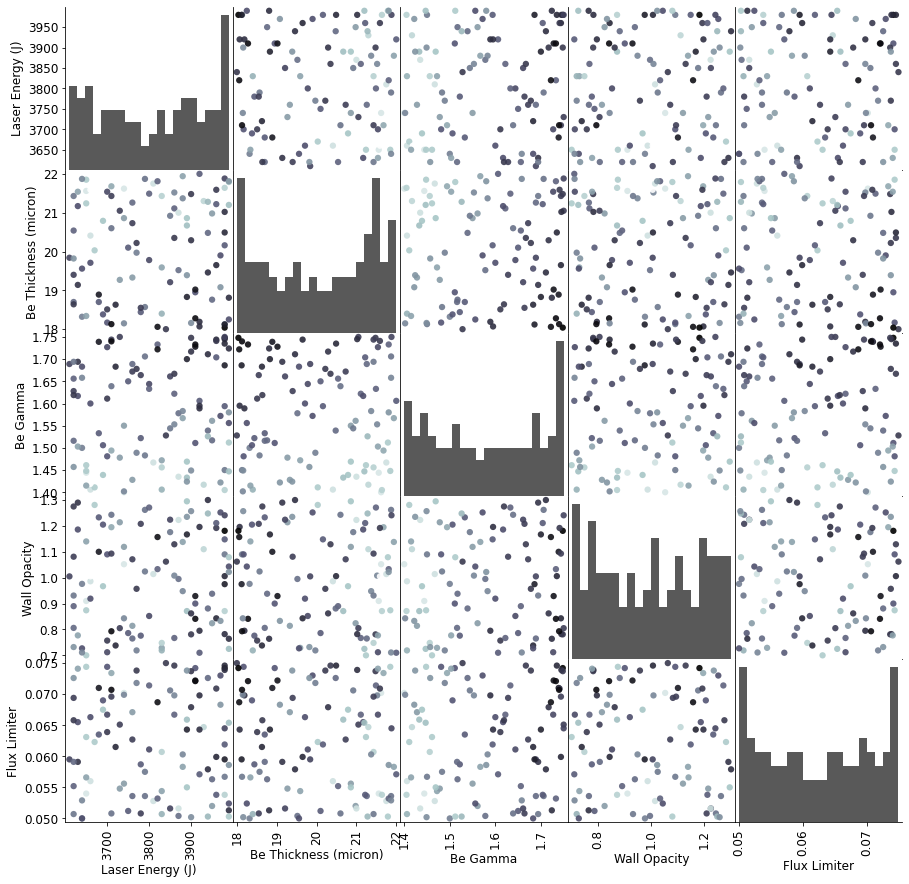

In [5]:
kwds = {"kwargs":{"cmap",'viridis'}} #{"kwds":{"kwargs":{"colormap":'viridis'}}}
grr = pd.plotting.scatter_matrix(sd.iloc[:,[2,4,5,6,7]], c=sd.iloc[:,9], figsize=(15,15), marker='o',grid=True,
                        hist_kwds={'bins': 20,"color":"0.35"}, s=40, alpha=.9, cmap = 'bone')
show("laser_input") #had to comment out line to get grid

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    sd.iloc[:,[2,4,5,6,7]], sd.iloc[:,9], test_size=int(sd.shape[0]*.15), random_state=4)

regr_rf = RandomForestRegressor(n_estimators=200, max_depth=300, max_features='auto')
regr_rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=300, n_estimators=200)

AxesSubplot(0.125,0.125;0.775x0.755)


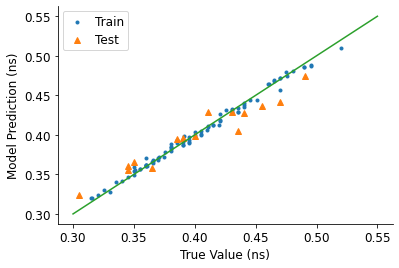

0.014178603000000064
0.0353642326093061
0.016390431189051573
0.02555949486276605
0.016311066914736893


In [7]:
plt.plot(y_train, regr_rf.predict(X_train), ".",label="Train")
plt.plot(y_test, regr_rf.predict(X_test), "^",label="Test")
plt.plot([0.3,0.55],[0.3,0.55])
plt.legend(loc="best")
plt.xlabel("True Value (ns)")
plt.ylabel("Model Prediction (ns)")
show("laser_tr_test")
print(np.mean(np.abs(regr_rf.predict(X_test)-y_test)))
print(np.mean(np.abs(regr_rf.predict(X_test)-y_test)/y_test))
print(np.sqrt(np.mean(np.square(regr_rf.predict(X_test)-y_test))))
print(np.sqrt(np.mean(np.square(regr_rf.predict(X_test)-y_test)/y_test)))
print(np.std(regr_rf.predict(X_test)-y_test))

In [8]:

vals = np.arange(1,205,5)
errors = np.zeros(vals.size)
i = 0
for nest in vals:
    regr_rf = RandomForestRegressor(n_estimators=nest, max_depth=3000, oob_score=True)
    regr_rf.fit(X_train, y_train)
    errors[i] = 1-regr_rf.oob_score_
    i += 1

/Users/rmcclarr/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:833: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/rmcclarr/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:833: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/rmcclarr/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:833: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


AxesSubplot(0.125,0.125;0.775x0.755)


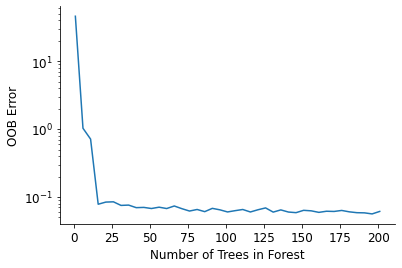

In [9]:
plt.semilogy(vals,errors)
plt.ylabel("OOB Error")
plt.xlabel("Number of Trees in Forest")
show("Convergence_laser")

In [10]:
print(regr_rf.feature_importances_)
print(sd['Breakout for Be (ns)'].quantile((.5,.9)))

[0.01033767 0.18937643 0.72726917 0.01499727 0.05801947]
0.5    0.395203
0.9    0.470302
Name: Breakout for Be (ns), dtype: float64


3820.0 20.16 0.39 1.005
(200, 200) (200, 200)
[0.45110084 0.45110084 0.45089953 ... 0.35624424 0.35632058 0.35649761]


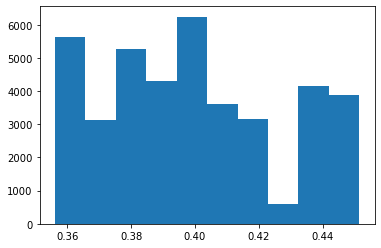

0.01671452403335103


<ipython-input-11-c3fbff904058>:26: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(g,f,closeness(regr_rf.predict(tmp)).reshape((n1d,n1d)), cmap="bone_r")


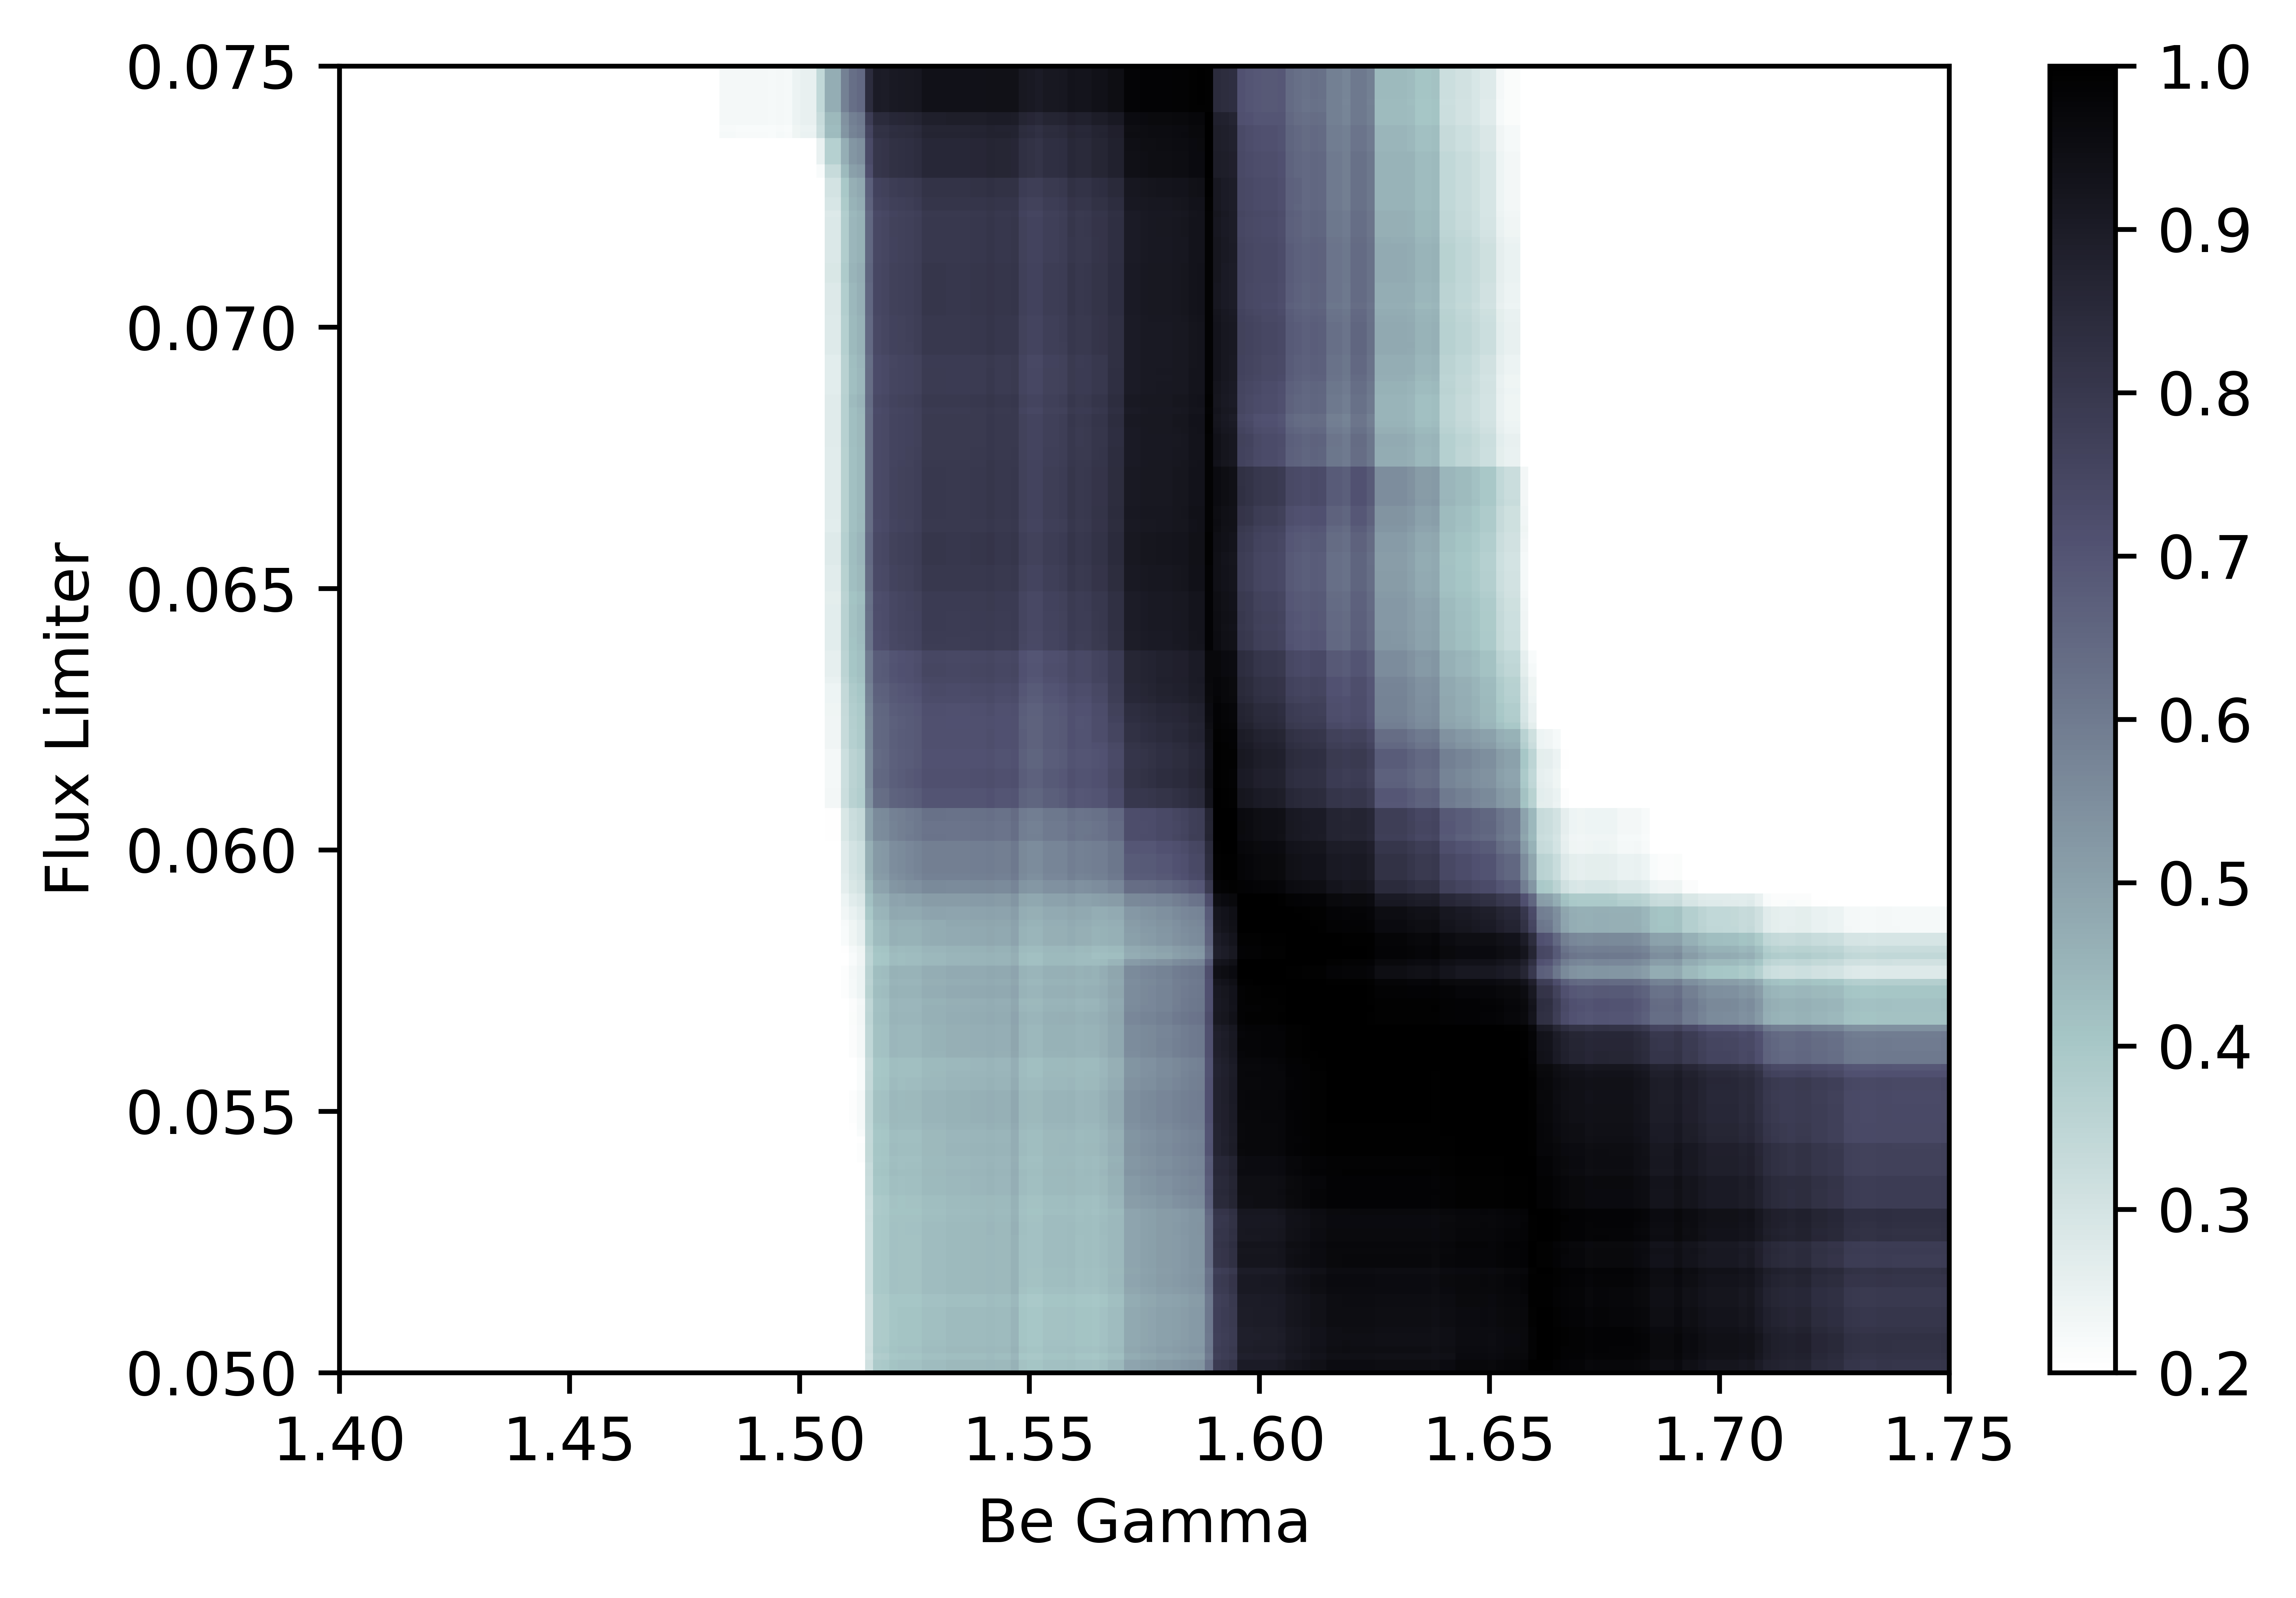

In [11]:
target = 0.39
eng = sd['Laser Energy (J)'].median()
thickness = sd['Be Thickness (micron)'].median()
wall_op = sd['Wall Opacity'].median()
print(eng,thickness,target,wall_op)
n1d = 200
num_evals = n1d**2
gamma_val = np.linspace(sd['Be Gamma'].min(),sd['Be Gamma'].max(),n1d)
flux_lim = np.linspace(sd['Flux Limiter'].min(),sd['Flux Limiter'].max(),n1d)

g,f = np.meshgrid(gamma_val,flux_lim)
print(g.shape,f.shape)
tmp=pd.DataFrame(data=np.repeat(a=eng,repeats=num_evals),columns=["Laser Energy (J)"])
tmp['Be Thickness (micron)'] = np.repeat(a=thickness,repeats=num_evals)
tmp['Be Gamma'] = g.reshape((num_evals,1))
tmp['Wall Opacity'] = np.repeat(a=wall_op,repeats=num_evals)
tmp['Flux Limiter'] = f.reshape((num_evals,1))
print(regr_rf.predict(tmp))
plt.hist(regr_rf.predict(tmp))
plt.show()
fig=plt.figure(dpi=1200)
mod_sd = np.std(regr_rf.predict(X_test)-y_test)
print(mod_sd)
mod_var = mod_sd**2
closeness = lambda x: np.exp(-(x-target)**2/mod_var)
plt.pcolormesh(g,f,closeness(regr_rf.predict(tmp)).reshape((n1d,n1d)), cmap="bone_r")
plt.xlabel("Be Gamma")
plt.ylabel("Flux Limiter")
plt.clim([0.2,1]) #c_ax.yaxis.set_ticks_position('left')
plt.colorbar()
#show("calibrate_laser.jpg")

In [12]:
sd.loc[((sd['Be Gamma'] > 1.59) & (sd['Be Gamma'] < 1.65) & ((sd['Flux Limiter']>0.052) & (sd['Flux Limiter']<0.06)))]

,Run #,Laser Power (J),Laser Energy (J),Be Thickness (cm),Be Thickness (micron),Be Gamma,Wall Opacity,Flux Limiter,shock @20 um (ns),Breakout for Be (ns),Breakout for Be (ps)
14,15.0,39200000000000000000,3920.0,0.0022,22.0,1.606,0.71,0.0571,0.425501,0.390757,390.757


AxesSubplot(0.125,0.657941;0.352273x0.222059)
AxesSubplot(0.547727,0.657941;0.352273x0.222059)
AxesSubplot(0.125,0.391471;0.352273x0.222059)
AxesSubplot(0.547727,0.391471;0.352273x0.222059)
AxesSubplot(0.125,0.125;0.352273x0.222059)
AxesSubplot(0.547727,0.125;0.352273x0.222059)


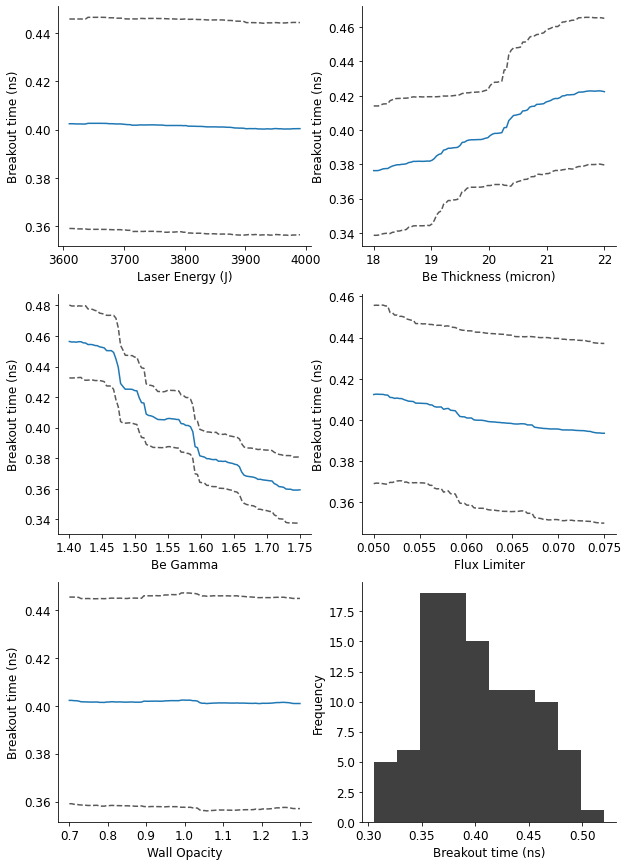

In [13]:
#main effects for energy
num_points = 100
me = np.zeros(num_points)
sde = np.zeros(num_points)

fig, axs = plt.subplots(3, 2, figsize=(10,15))

les = np.linspace(sd['Laser Energy (J)'].min(),sd['Laser Energy (J)'].max(),num_points)
for i in range(num_points):
    tmp = sd.iloc[:,[2,4,5,6,7]].copy()
    tmp['Laser Energy (J)'] = les[i]
    tmp_pred= regr_rf.predict(tmp)
    me[i] = np.mean(tmp_pred)
    sde[i] = np.std(tmp_pred)

axs[0,0].plot(les,me)
axs[0,0].plot(les,me+sde,'--',color="0.35")
axs[0,0].plot(les,me-sde,'--',color="0.35")
axs[0,0].set(xlabel="Laser Energy (J)", ylabel="Breakout time (ns)")
me = np.zeros(num_points)
sde = np.zeros(num_points)
#plt.show()

bes = np.linspace(sd['Be Thickness (micron)'].min(),sd['Be Thickness (micron)'].max(),num_points)
for i in range(num_points):
    tmp = sd.iloc[:,[2,4,5,6,7]].copy()
    tmp['Be Thickness (micron)'] = bes[i]
    tmp_pred= regr_rf.predict(tmp)
    me[i] = np.mean(tmp_pred)
    sde[i] = np.std(tmp_pred)
axs[0,1].plot(bes,me)
axs[0,1].plot(bes,me+sde,'--',color="0.35")
axs[0,1].plot(bes,me-sde,'--',color="0.35")
axs[0,1].set(xlabel="Be Thickness (micron)", ylabel="Breakout time (ns)")
#plt.show()

bes = np.linspace(sd['Be Gamma'].min(),sd['Be Gamma'].max(),num_points)
for i in range(num_points):
    tmp = sd.iloc[:,[2,4,5,6,7]].copy()
    tmp['Be Gamma'] = bes[i]
    tmp_pred= regr_rf.predict(tmp)
    me[i] = np.mean(tmp_pred)
    sde[i] = np.std(tmp_pred)
axs[1,0].plot(bes,me)
axs[1,0].plot(bes,me+sde,'--',color="0.35")
axs[1,0].plot(bes,me-sde,'--',color="0.35")
axs[1,0].set(xlabel="Be Gamma", ylabel="Breakout time (ns)")
#plt.show()


bes = np.linspace(sd['Flux Limiter'].min(),sd['Flux Limiter'].max(),num_points)
for i in range(num_points):
    tmp = sd.iloc[:,[2,4,5,6,7]].copy()
    tmp['Flux Limiter'] = bes[i]
    tmp_pred= regr_rf.predict(tmp)
    me[i] = np.mean(tmp_pred)
    sde[i] = np.std(tmp_pred)
axs[1,1].plot(bes,me)
axs[1,1].plot(bes,me+sde,'--',color="0.35")
axs[1,1].plot(bes,me-sde,'--',color="0.35")
axs[1,1].set(xlabel="Flux Limiter", ylabel="Breakout time (ns)")
#plt.show()

bes = np.linspace(sd['Wall Opacity'].min(),sd['Wall Opacity'].max(),num_points)
for i in range(num_points):
    tmp = sd.iloc[:,[2,4,5,6,7]].copy()
    tmp['Wall Opacity'] = bes[i]
    tmp_pred= regr_rf.predict(tmp)
    me[i] = np.mean(tmp_pred)
    sde[i] = np.std(tmp_pred)
axs[2,0].plot(bes,me)
axs[2,0].plot(bes,me+sde,'--',color="0.35")
axs[2,0].plot(bes,me-sde,'--',color="0.35")
axs[2,0].set(xlabel="Wall Opacity", ylabel="Breakout time (ns)")

axs[2,1].hist(sd.iloc[:,9],color="0.25")
axs[2,1].set(xlabel="Breakout time (ns)", ylabel="Frequency")

show("main_effects_laser")